In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import scipy
import scipy.stats
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

#https://www.kaggle.com/roshansharma/breast-cancer-wisconsin


In [23]:
breastcancer=pd.read_csv('bc2.csv')

In [20]:
breastcancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [14]:
#checking missing values by each coulmn

breastcancer.isnull().sum()

# result: non

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#checking columns 

for col in breastcancer.columns: 
    print(col) 

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


###  As our dataset is balanced (around 60-40 ratio), there is no need to balance our data

In [5]:

breastcancer.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

---

## EDA

In [6]:
#Summary statistics of the dataset

print(breastcancer.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [24]:
#____________--> Dropped id for EDA purpose 

breastcancer.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [25]:
#____________--> Find skewness how the entire dataset look like 

breastcancer.skew(axis = 0, skipna = True) 

#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [26]:
breastcancer.describe()

#Some of our fetatures, like 'area_mean', 'area_worst' etc., have lage max values. 
#Are they outliers? Possible yes.
#We will go ahead and check these by building distribution plots of the features.
#For example boxplots, qqplots, histograms plots. 
#Distribution plots can show as, is the distribution of the feature normal and have it outliers.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


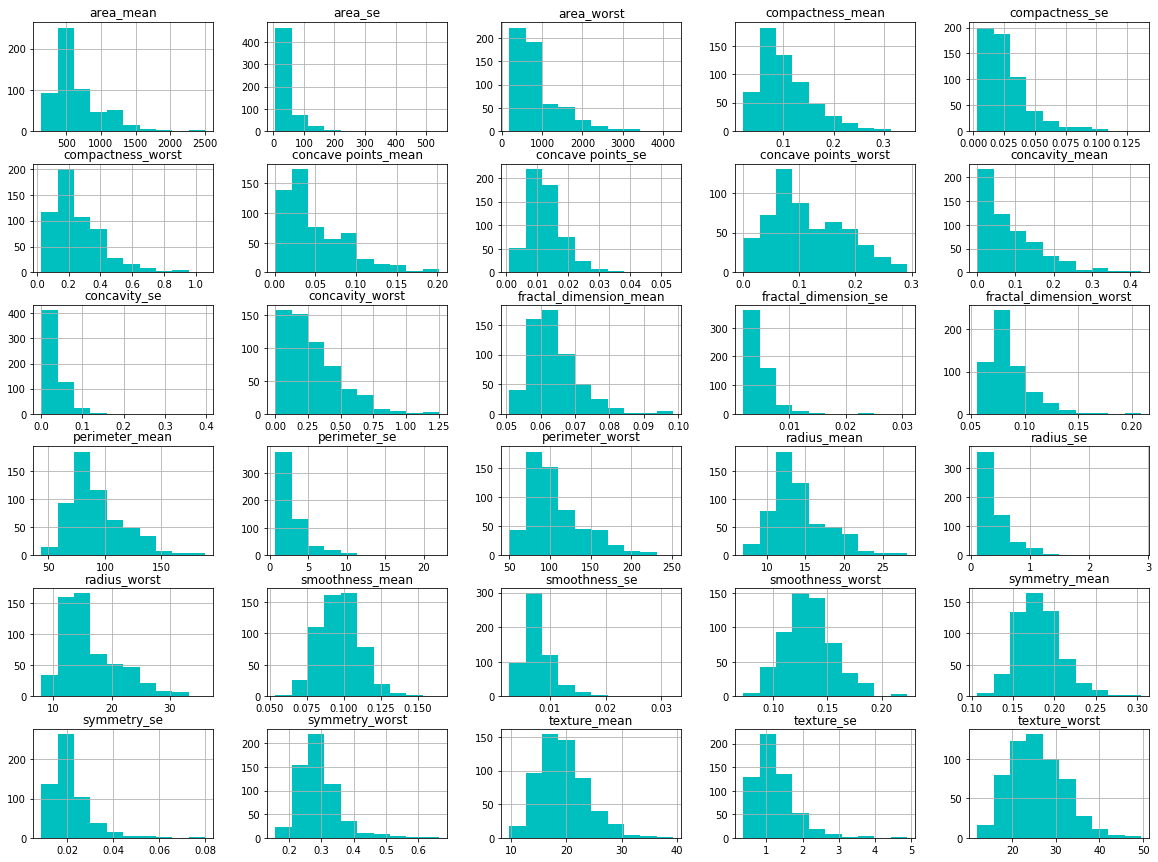

In [10]:
#____________-->  Histogram of the data by each column

        #______ we can tell some of columns are right-skewed 

X = breastcancer.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

In [6]:
#____________--> Number of "malignant" & "benign"

breastcancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

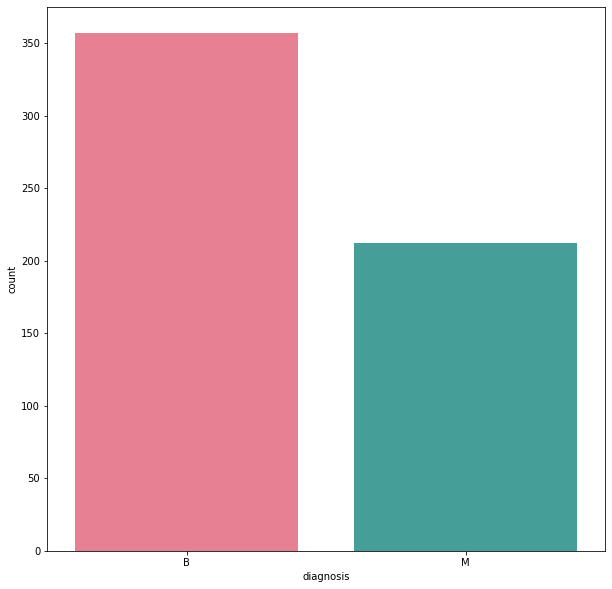

In [18]:
#____________-->bar graph that visualize the number of "malignant" & "benign"

plt.figure(figsize=(9,9))
sns.countplot(breastcancer['diagnosis'], label="Count", palette="husl",
              order=pd.value_counts(breastcancer['diagnosis']).iloc[:17].index)
plt.show()

#or we can use color ['#FF1493', '#FF69B4']

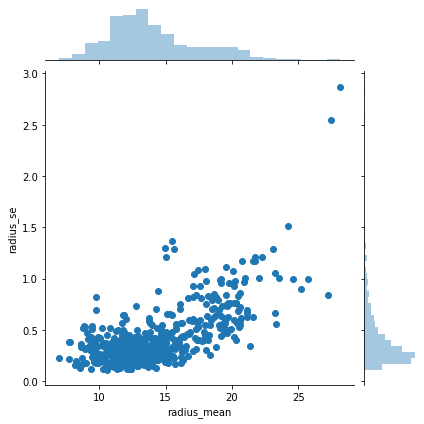

In [6]:
sns.jointplot('radius_mean', 'radius_se', data=breastcancer)

In [27]:
#____________--> Proportion of the number of "malignant" & "benign"

countNoDisease = len(breastcancer[breastcancer.diagnosis == 'B'])
countHaveDisease = len(breastcancer[breastcancer.diagnosis == 'M'])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(breastcancer.diagnosis))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(breastcancer.diagnosis))*100)))

Percentage of Patients Haven't Heart Disease: 62.74%
Percentage of Patients Have Heart Disease: 37.26%


In [28]:
#____________--> Pie chart - Proportion of the number of "malignant" & "benign"

proportion_diag = go.Pie(labels = ['benign','malignant'], values = breastcancer
               ['diagnosis'].value_counts(), 
               marker=dict(colors=['c', 'pink'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [proportion_diag], layout=layout)
py.iplot(fig)

In [29]:
#____________--> Make dummy for diagnosis

breastcancer.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)


In [30]:
#____________--> Make dataframe for dummy for diagnosis 

mal = breastcancer[breastcancer['diagnosis'] == 1]
ben = breastcancer[breastcancer['diagnosis'] == 0]

### EDA (Cont'd) - Histogram 

### Visualize tumor characteristics for benign and malignant diagnoses 

#### "Mean"

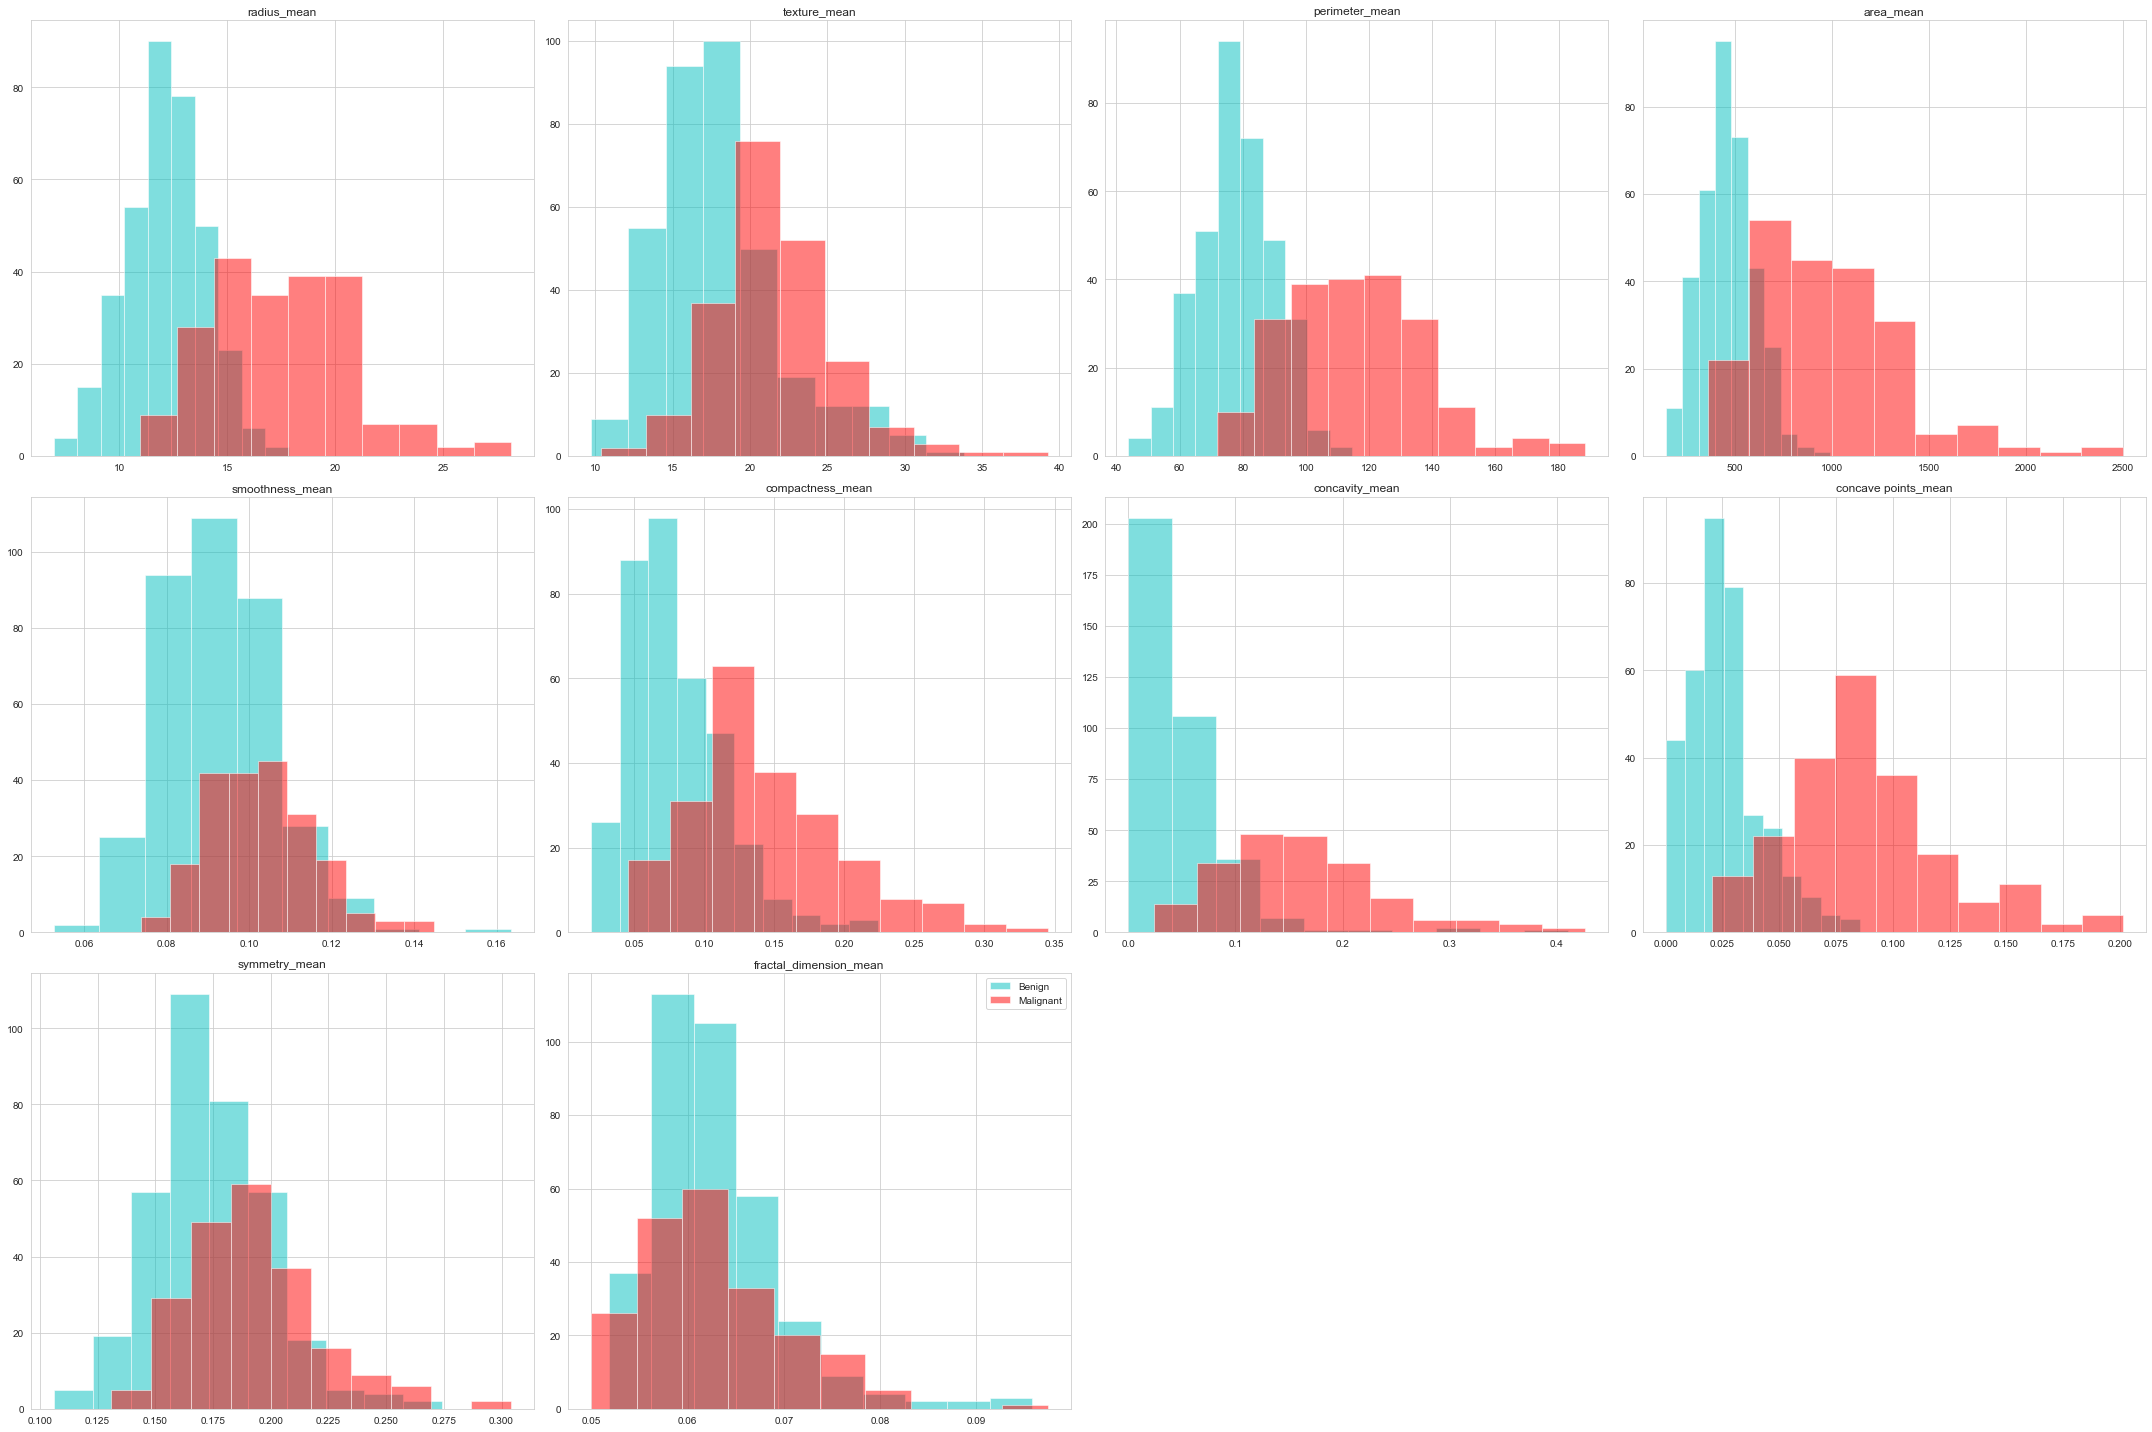

In [14]:

fig = plt.figure(figsize=(30,20))


# Created 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breastcancer.columns[1:11])):
    
    # Enumerated starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Created axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plotted via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'c')
    ax.hist(mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

#dodgerblue

#### "Standard Error" 

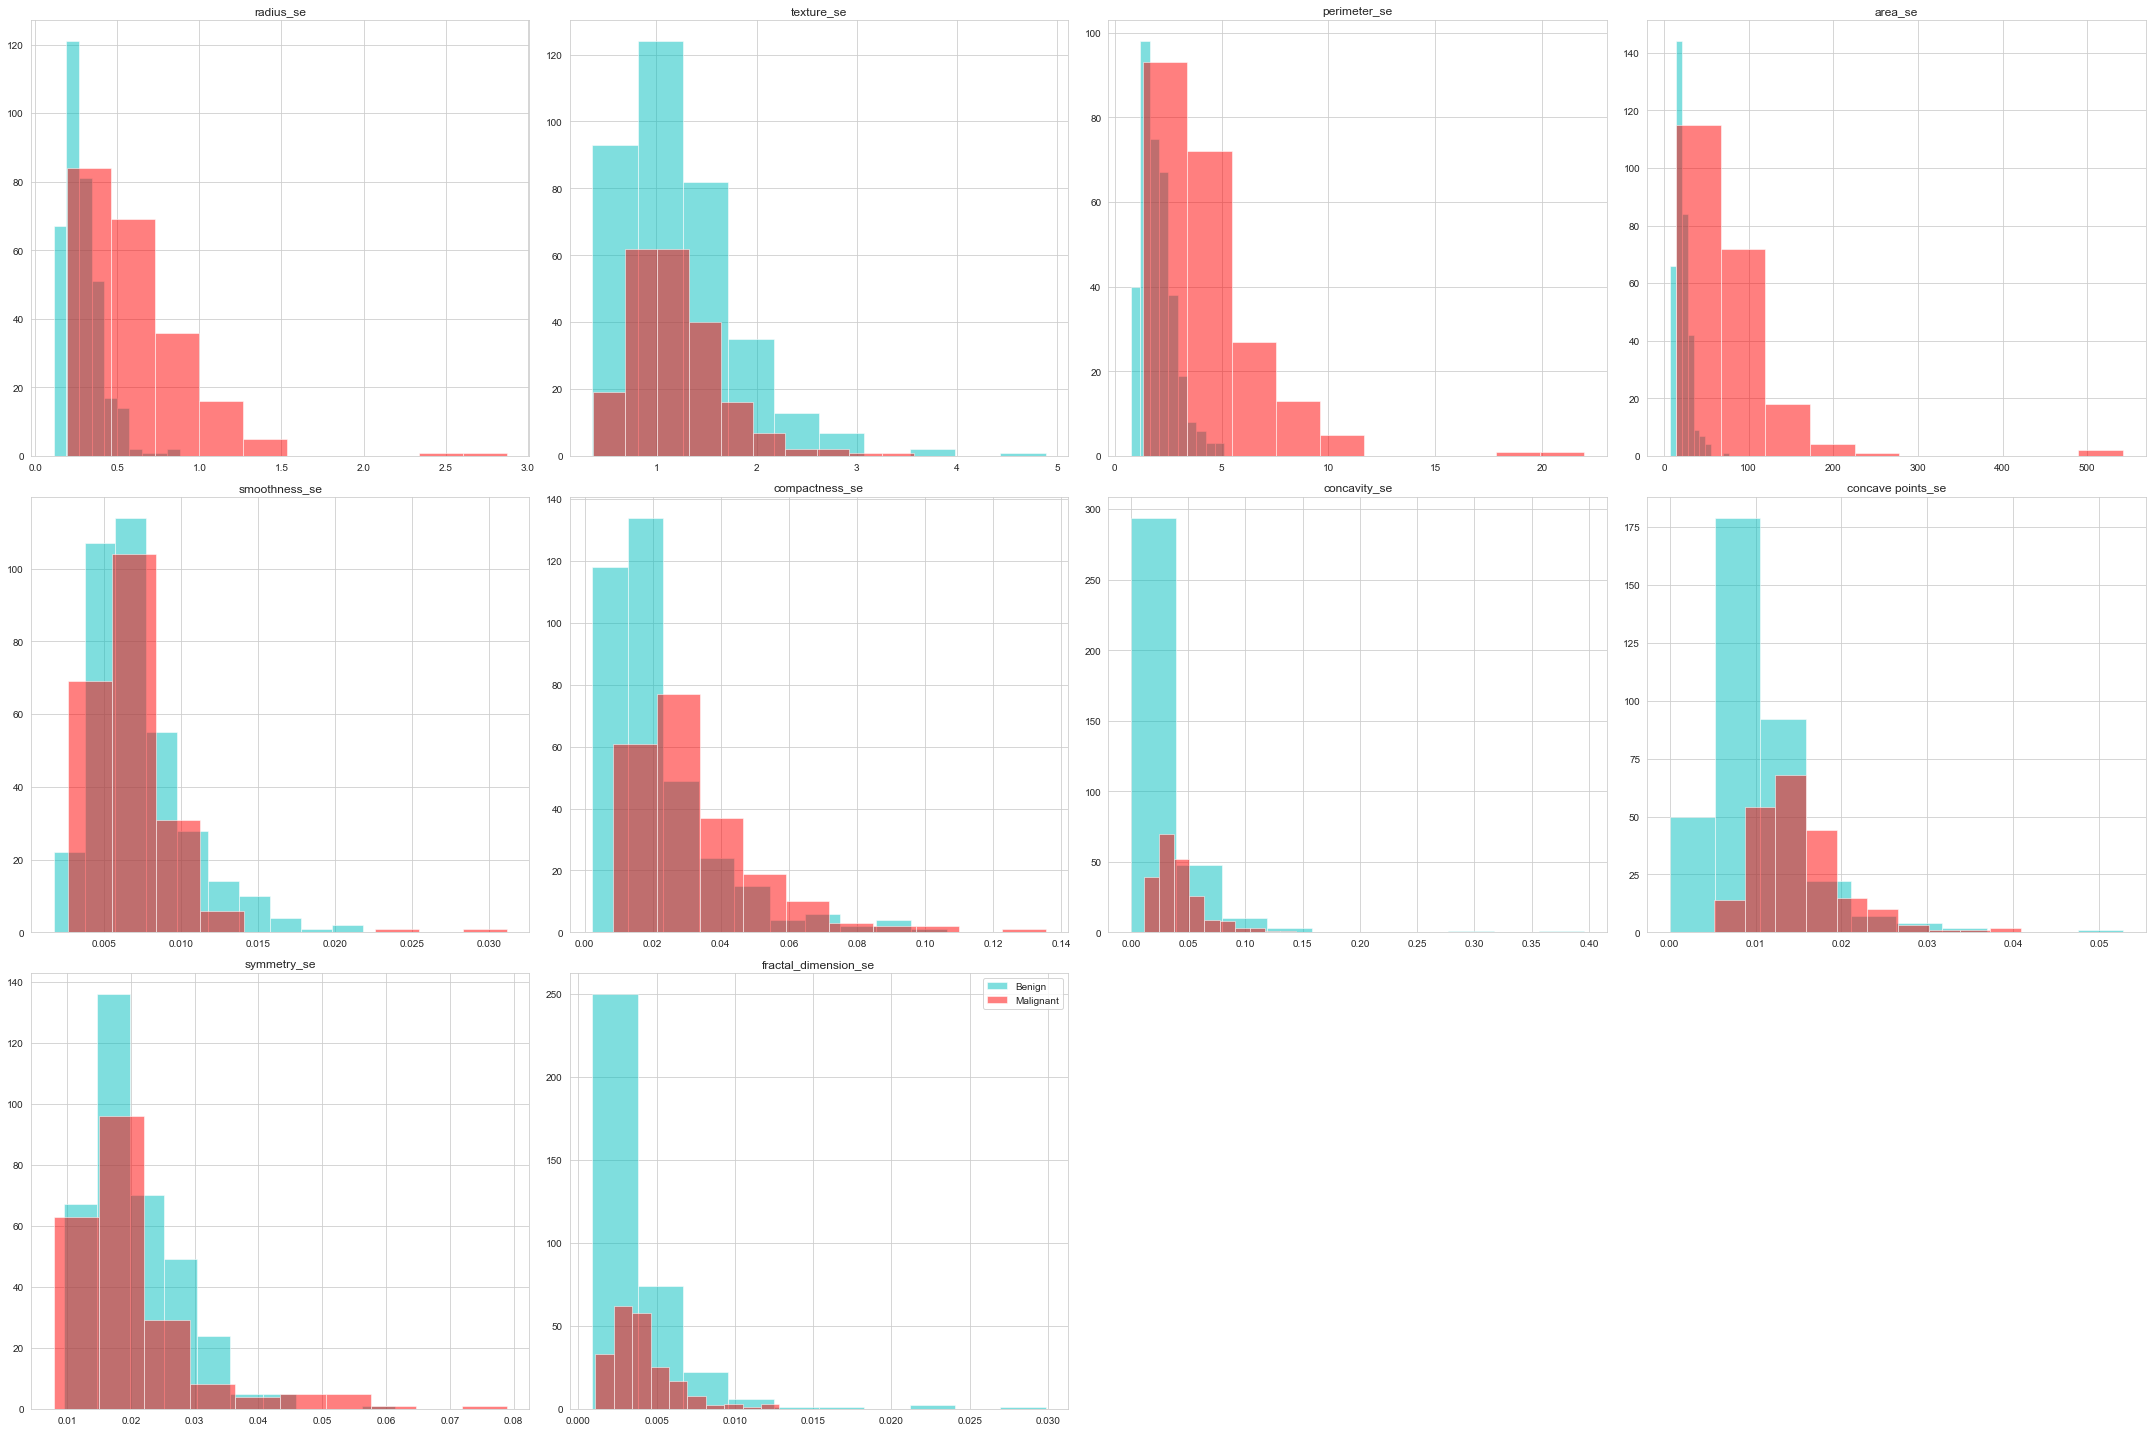

In [15]:
fig = plt.figure(figsize=(30,20))


# Created 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breastcancer.columns[11:21])):
    
    # Enumerated starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Created axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Ploted via histogram tumor charateristics using stacked and alpha parameters for  comparisons.
    ax.hist(ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'c')
    ax.hist(mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()


#### "Worst" 

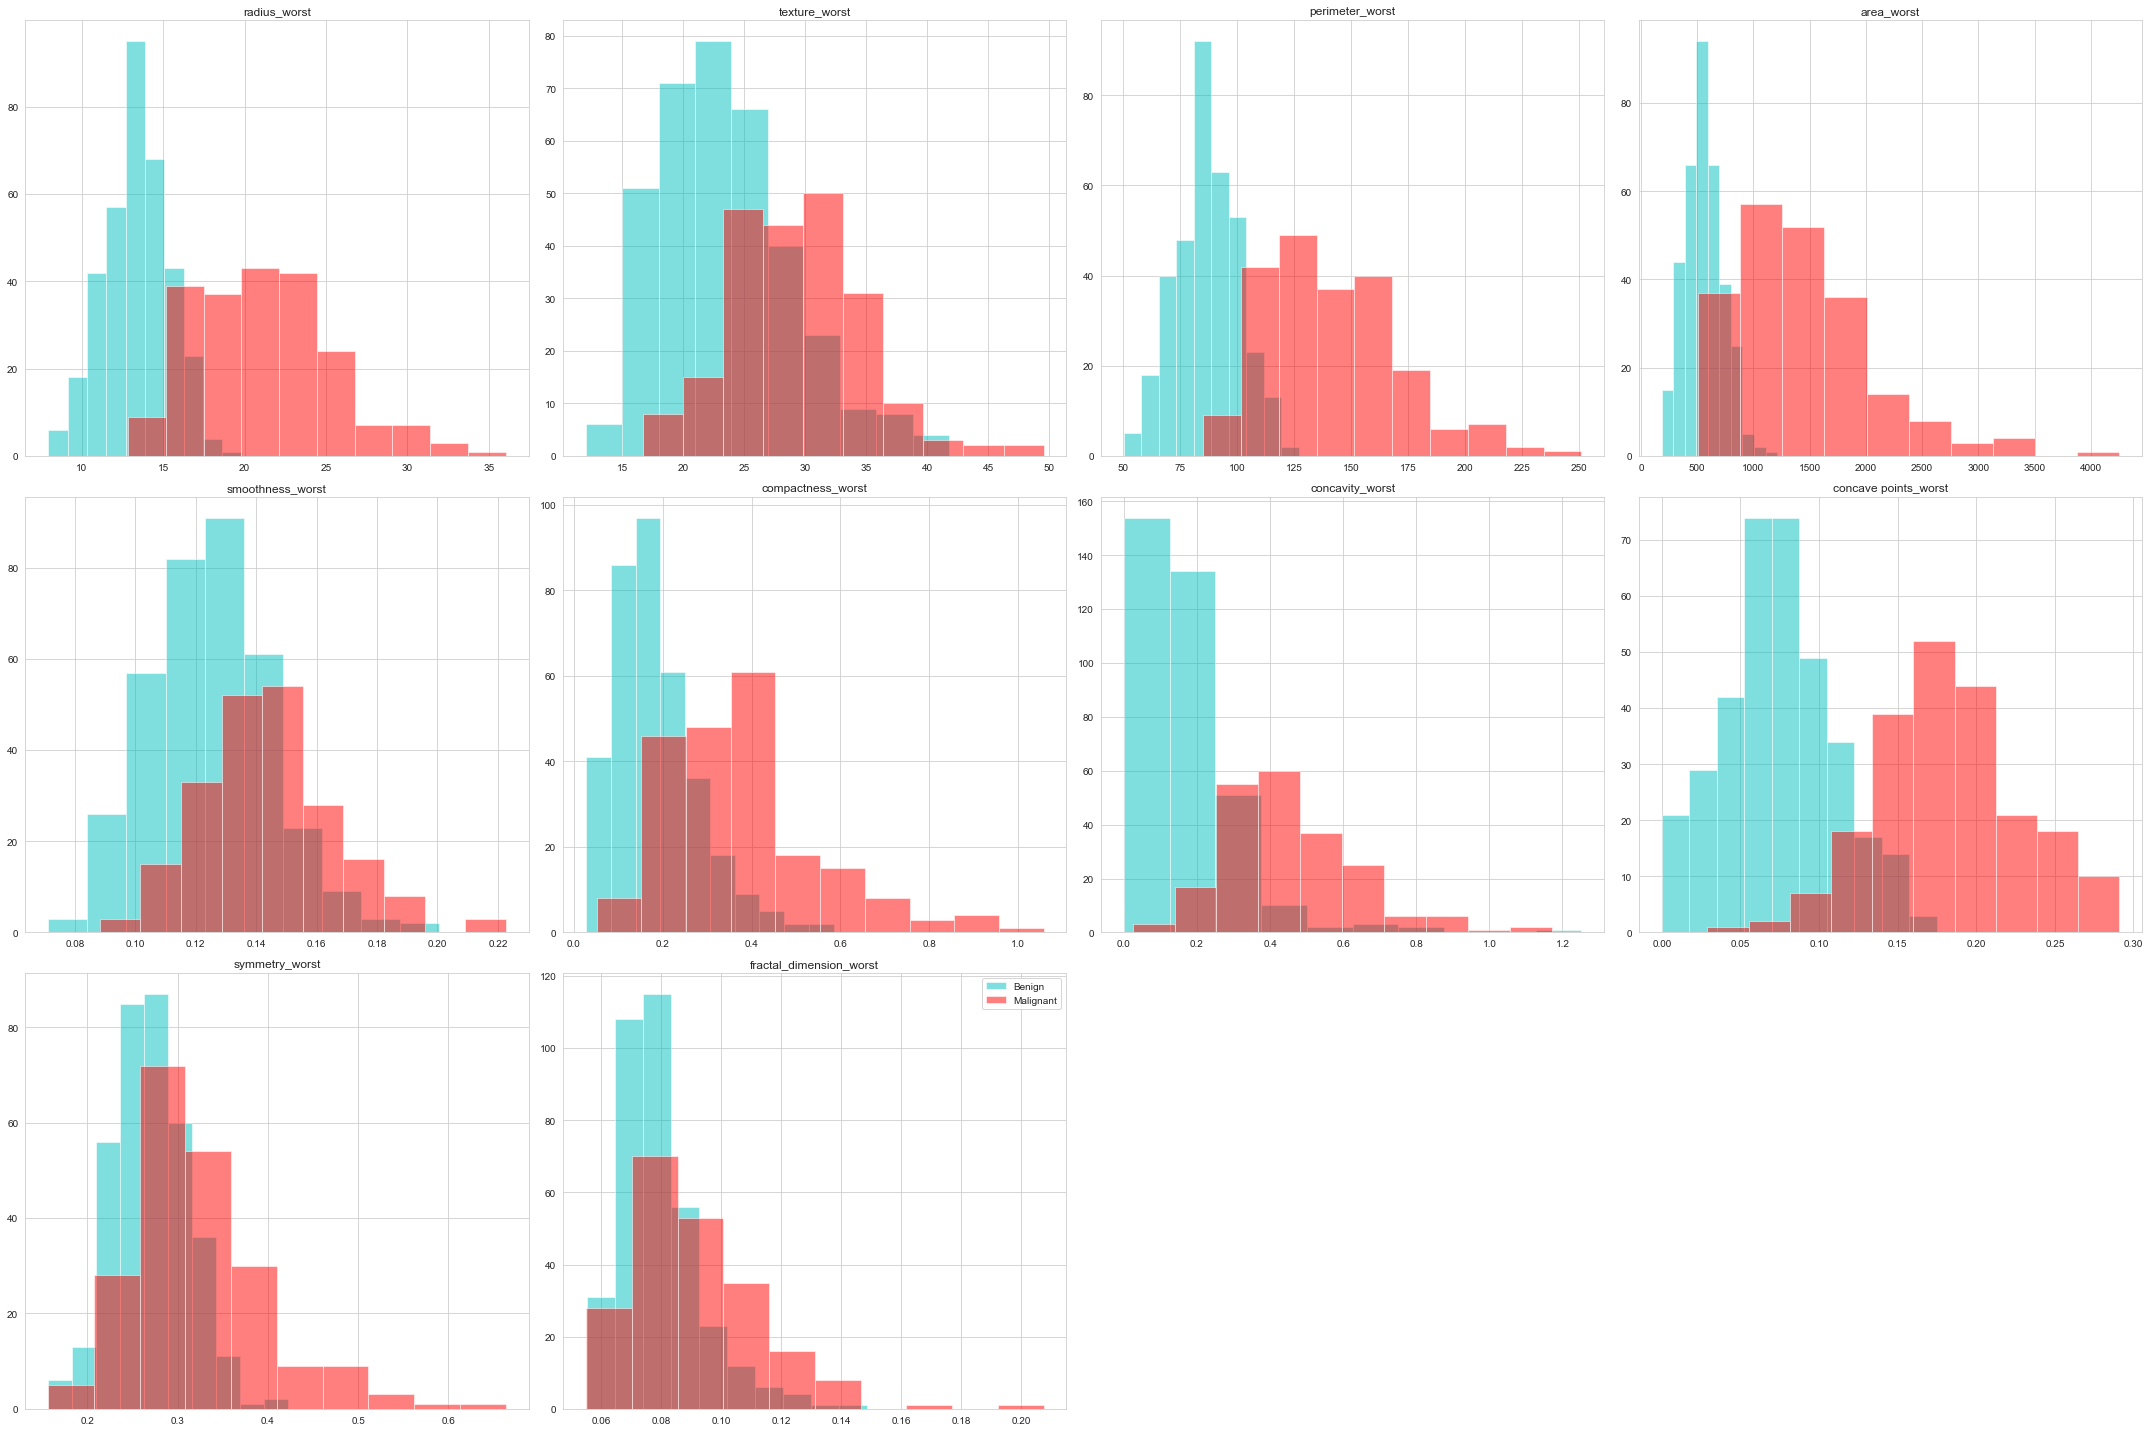

In [90]:
fig = plt.figure(figsize=(30,20))


# Created 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breastcancer.columns[21:31])):
    
    # Enumerated starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Created axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plotted via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(ben[b], label = 'Benign', stacked = True, alpha=0.5, color= 'c')
    ax.hist(mal[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()


## Swarm Plots 

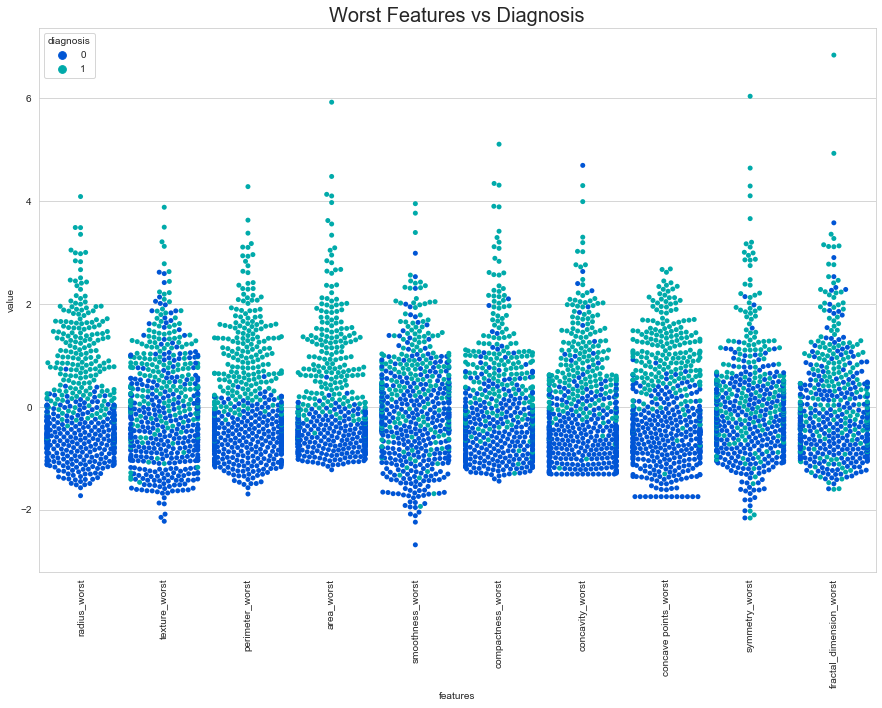

In [16]:
y = breastcancer['diagnosis']
fun = breastcancer.drop('diagnosis', axis = 1)

fun = (fun - fun.mean()) / (fun.std()) 
df = pd.concat([y, fun.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=df, palette = 'winter')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

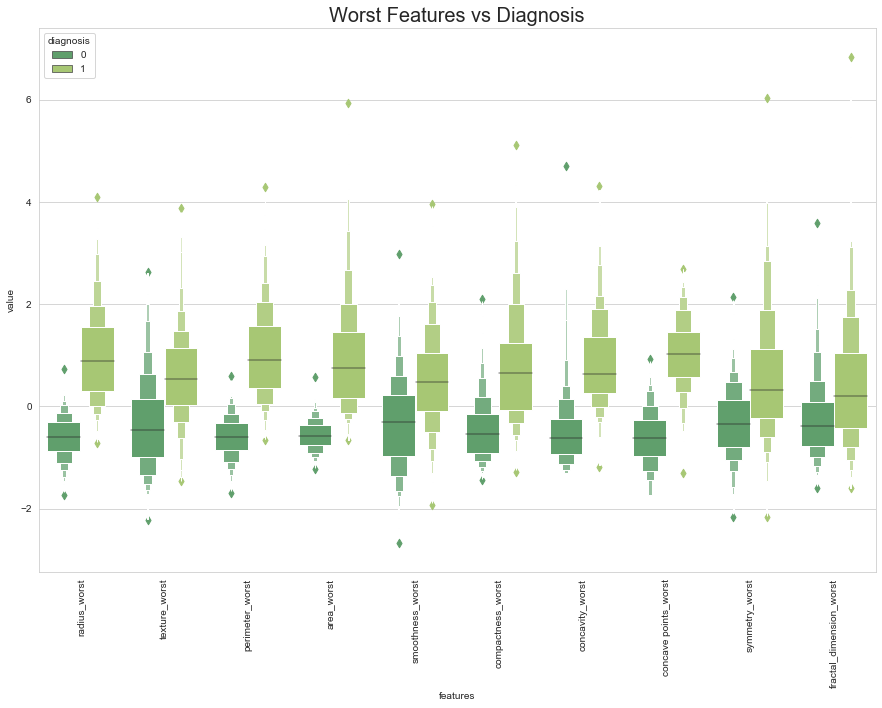

In [47]:
y = breastcancer['diagnosis']
fun = breastcancer.drop('diagnosis', axis = 1)

fun = (fun - fun.mean()) / (fun.std()) 
df = pd.concat([y, fun.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'summer')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

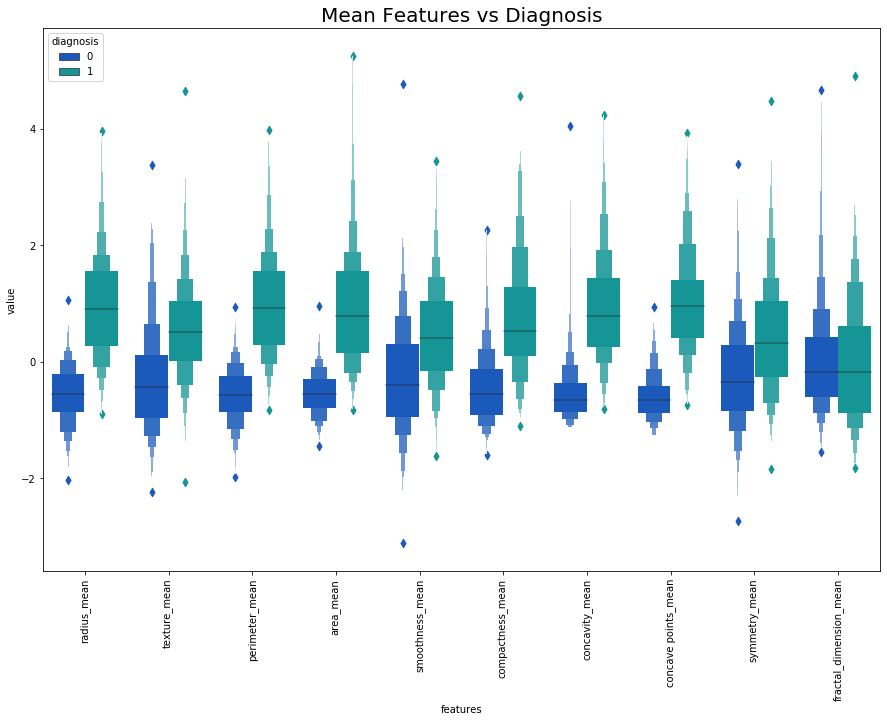

In [22]:
y = breastcancer['diagnosis']
fun = breastcancer.drop('diagnosis', axis = 1)

fun = (fun - fun.mean()) / fun.std()
df = pd.concat([y, fun.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'winter')
plt.title('Mean Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

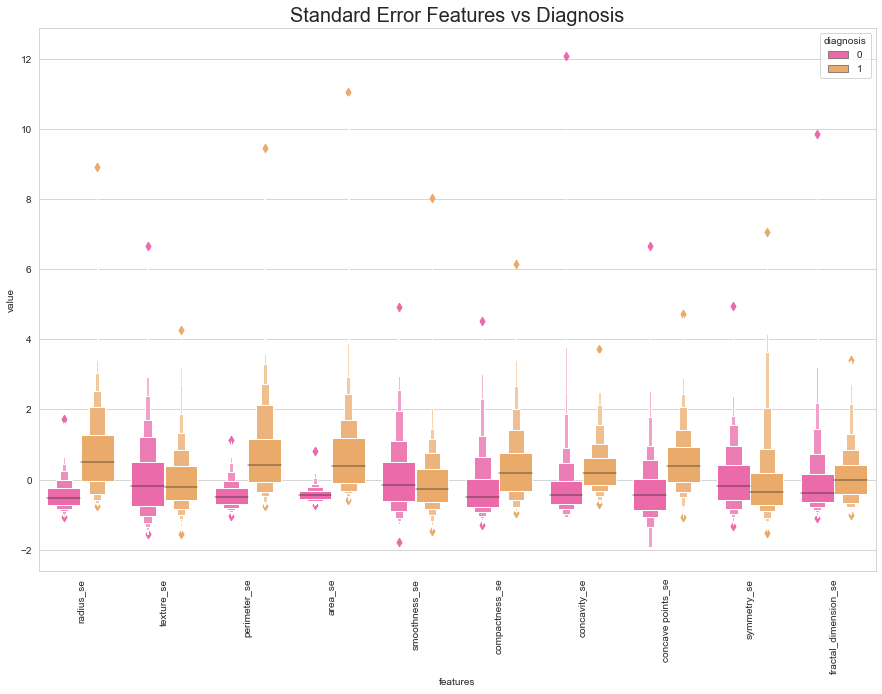

In [17]:
y = breastcancer['diagnosis']
fun = breastcancer.drop('diagnosis', axis = 1)

fun = (fun - fun.mean()) / fun.std()
df = pd.concat([y, fun.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'spring')
plt.title('Standard Error Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [ ]:

# -----------------------------Takeaways from Histogram--------------------------------------------#


#    features that are largely segregated between diagnosis based on the histogram 
#         radius mean , perimeter mean, concave points_mean,  and concavity mean
#                radius_worst, parimeter worst, concave points_worst



----

## EDA (con'td) - Correlation 

In [25]:
corr = breastcancer.corr()
corr.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


In [26]:
#CORRELATION Visualization 

#__since we have so many variables, for audience to read easier, the hlaf of other will be hidden 

In [27]:
mask= np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

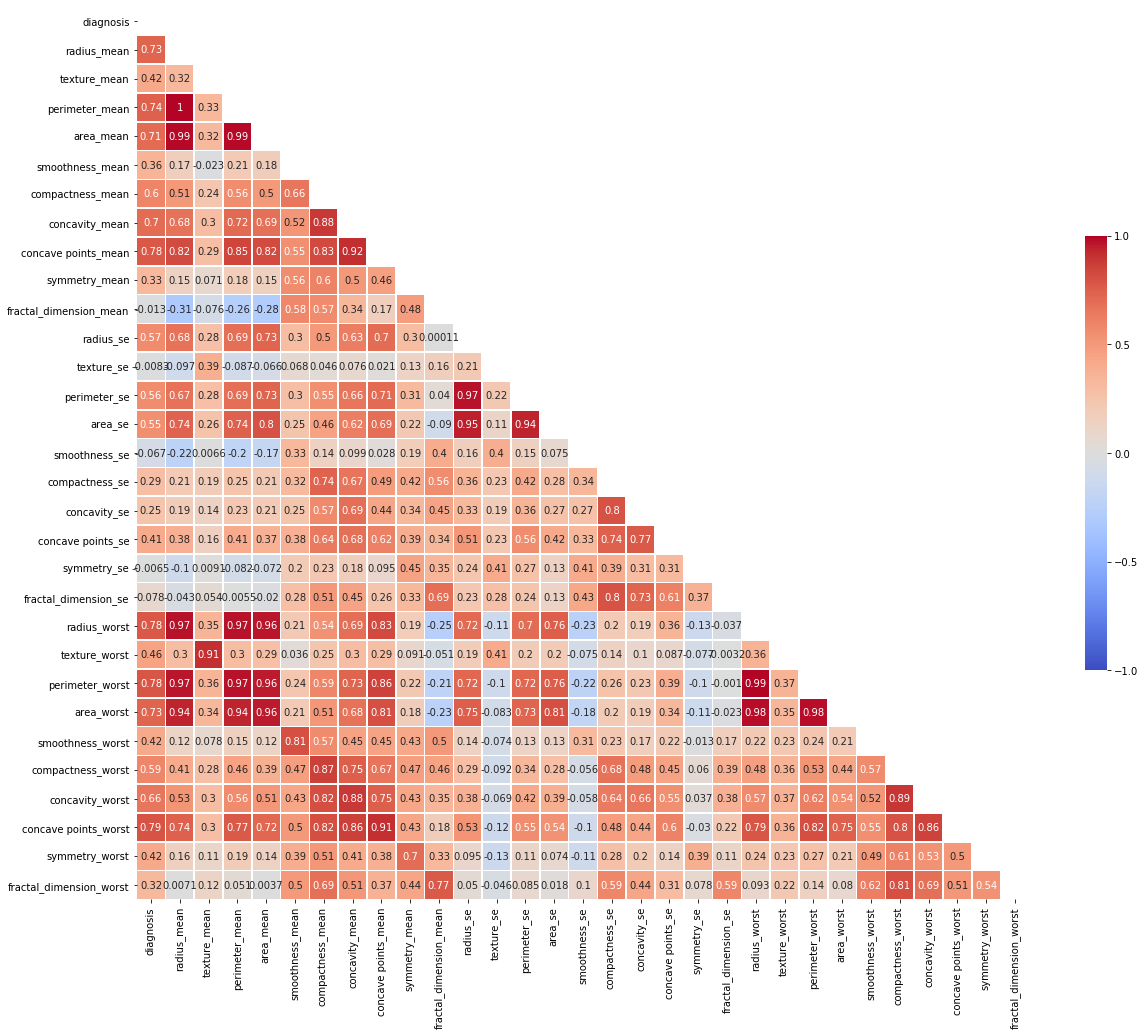

In [32]:
f, ax = plt.subplots(figsize=(20,20))

heatmap = sns.heatmap(corr,
                     mask = mask,
                     square = True,
                     linewidths = .5,
                     cmap = 'coolwarm',
                     cbar_kws = {'shrink' : .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                     vmin = -1,
                     vmax = 1,
                     annot = True, 
                     annot_kws = {"size" : 10})
#add column names as labels
ax.set_yticklabels(corr.columns, rotation=0)
ax.set_xticklabels(corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Feature selection based on our hypothesis

hypothesis : according to "COMPUTERIZED BREAST CANCER DIAGNOSIS AND PROGNOSIS FROM FINE NEEDLE ASPIRATES",  

A size, a texture, and a shape feature are highly influential factors on breast cancer. 

we will test out to see if this is correct compared to our own selection. 


columns that indicate size, texture, and the shape are : 

area_mean perimeter_mean, radius_mean, symmetry_mean, texture_mean
area_se perimeter_se, radius_se, symmetry_se, texture_se
area_worst perimeter_worst, radius_worst, symmetry_worst, texture_worst
    
    
Therefore, we are only going to focus on these variables for testing the hypothesis 
    

---

### Note

We notcied that the correlation table above is a tad hard to tell which independent variable are highly correlated or not. Also, "_mean" & "_worst" obviously highly correlated because _worst are largest mean value for the number of the corresponded __mean 

Therefore, we have decided to make a separate dataframe only contains "mean", "se", "worst" respectively


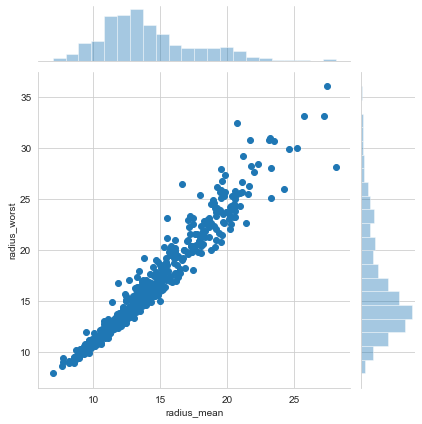

In [32]:
sns.jointplot('radius_mean', 'radius_worst', data=breastcancer)

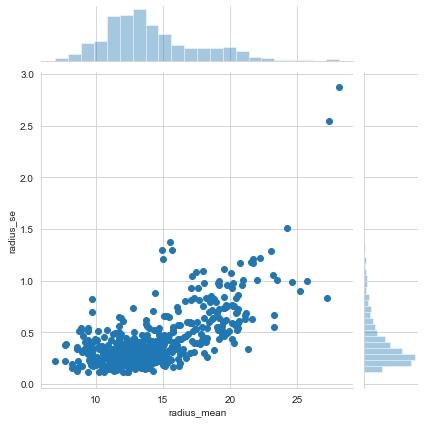

In [31]:
sns.jointplot('radius_mean', 'radius_se', data=breastcancer)

---

## A data fram only contains "_mean" 

In [33]:


mean = [i for i in breastcancer.columns if i.endswith("mean")]
list_mean=list(mean)
bc_mean = breastcancer[list_mean]
bc_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


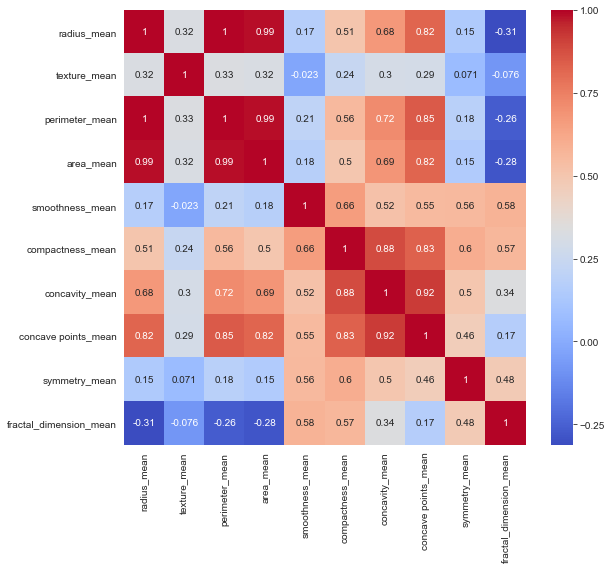

In [34]:
#Corrrelation of independent variables of bc_mean

plt.subplots(figsize=(9,8))
sns.heatmap(bc_mean.corr(),cmap = 'coolwarm', annot=True)


mean_corr = bc_mean.corr()

In [163]:
# Drop one has highly correlated to prevent "collinearity"

columns_mean = np.full((mean_corr.shape[0],), True, dtype=bool)
for i in range(mean_corr.shape[0]):
    for j in range(i+1, mean_corr.shape[0]):
        if mean_corr.iloc[i,j] >= 0.85:
            if columns_mean[j]:
                columns_mean[j] = False

In [164]:
#The results left are the one we will look into. 
  
    #The variables related to "size, texture, and the shape " are 
    #    'radius_mean', 'texture_mean','symmetry_mean'

selected_col_mean = mean_corr.columns[columns_mean]

selected_col_mean

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'diagnosis'],
      dtype='object')

In [174]:
#select only related to hypothesis 

mean_hypothesis = bc_mean[['radius_mean', 'texture_mean', 'symmetry_mean']]
mean_hypothesis.head()


#add diagnosis 

mean_hypothesis['diagnosis']= breastcancer['diagnosis']
mean_hypothesis.head()

,radius_mean,texture_mean,symmetry_mean,diagnosis
0,17.99,10.38,0.2419,1
1,20.57,17.77,0.1812,1
2,19.69,21.25,0.2069,1
3,11.42,20.38,0.2597,1
4,20.29,14.34,0.1809,1


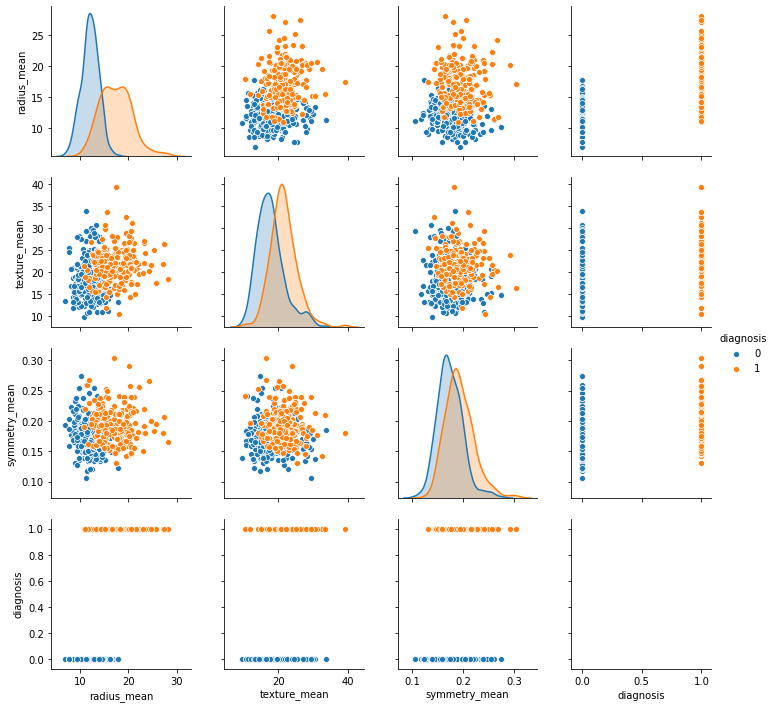

In [175]:
sns.pairplot(mean_hypothesis, hue='diagnosis')

In [176]:
#In order to see frequency by diagnosis for each variable, changed "M" & "N" to "1" & "0"

#def score_to_numeric(x):

#    if x=='B':

#        return 0

#    if x=='M':

#        return 1


#breastcancer['dummy_cat'] = breastcancer['diagnosis'].apply(score_to_numeric)
#breastcancer.head()

In [131]:
#Summaey statstic_ to get "MAX" & "MEAN" ->  These will be used for creating bins below

bc_mean.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [88]:
#Radius_mean max:28.11 , min 6.98

bins = [0,5, 10, 15, 20, 25,30]
names = ['<5', '5-10','10-15', '15-20','20-25','25-30']
 
breastcancer['radius_mean_bins'] = pd.cut(breastcancer['radius_mean'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,15-20
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,20-25
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,15-20
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,10-15
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,20-25


In [92]:
# Frequency_table for radius_mean

test1=breastcancer.groupby(['diagnosis','radius_mean_bins']).count()['radius_mean'].reset_index()
test1

#results: most of radius mean of Benign founded on around "10-15" whereas most of radius mean of Malignant founded on around "15-20" 



,diagnosis,radius_mean_bins,radius_mean
0,B,<5,NaN
1,B,5-10,47.0
2,B,10-15,298.0
3,B,15-20,12.0
4,B,20-25,NaN
5,B,25-30,NaN
6,M,<5,NaN
7,M,5-10,NaN
8,M,10-15,51.0
9,M,15-20,116.0


In [132]:
#Texture_mean max:39.28 , min: 9.710000

bins = [0,5, 10, 15, 20, 25,30]
names = ['<5', '5-10','10-15', '15-20','20-25','25-30']
 
breastcancer['texture_mean_bins'] = pd.cut(breastcancer['texture_mean'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,10-15
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,15-20
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,20-25
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,20-25
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,10-15


In [133]:
# Frequency_table for texture_mean

test2=breastcancer.groupby(['diagnosis','texture_mean_bins']).count()['texture_mean'].reset_index()
test2

#results: 

,diagnosis,texture_mean_bins,texture_mean
0,B,<5,NaN
1,B,5-10,1.0
2,B,10-15,86.0
3,B,15-20,187.0
4,B,20-25,59.0
5,B,25-30,22.0
6,M,<5,NaN
7,M,5-10,NaN
8,M,10-15,4.0
9,M,15-20,66.0


In [134]:
#symmetry_mean max:0.30 , min: 0.11

bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
names = ['<0.05', '0.05-0.10','0.10-0.15', '0.15-0.20','0.20-0.25','0.25-0.30']
 
breastcancer['symmetry_mean_bins'] = pd.cut(breastcancer['symmetry_mean'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,10-15,0.20-0.25
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,15-20,0.15-0.20
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,20-25,0.20-0.25
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,20-25,0.25-0.30
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,10-15,0.15-0.20


In [136]:
#Frequency_table for symmetry_mean

test3=breastcancer.groupby(['diagnosis','symmetry_mean_bins']).count()['symmetry_mean'].reset_index()
test3


,diagnosis,symmetry_mean_bins,symmetry_mean
0,B,<0.05,NaN
1,B,0.05-0.10,NaN
2,B,0.10-0.15,54.0
3,B,0.15-0.20,257.0
4,B,0.20-0.25,41.0
5,B,0.25-0.30,5.0
6,M,<0.05,NaN
7,M,0.05-0.10,NaN
8,M,0.10-0.15,5.0
9,M,0.15-0.20,137.0


#### Conclusion: based on the frequency tables above, we are going to carry only with 'radius mean' and 'texture mean'

---

## A data fram only contains "_se" 

In [26]:
se = [i for i in breastcancer.columns if i.endswith("se")]
list_se=list(se)
bc_se = breastcancer[list_se]
bc_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


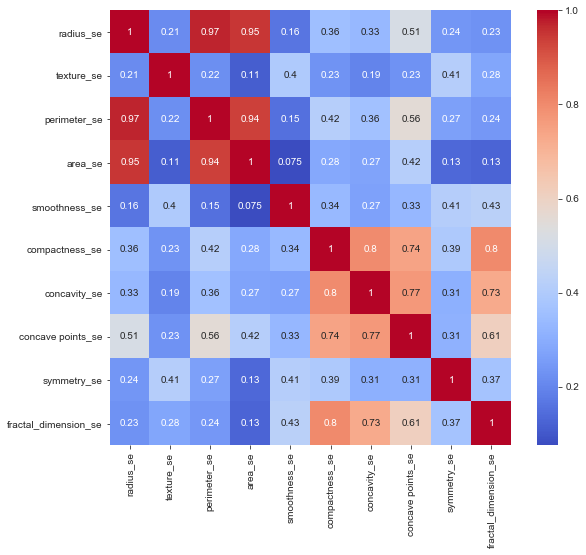

In [27]:
plt.subplots(figsize=(9,8))
sns.heatmap(bc_se.corr(),cmap = 'coolwarm', annot=True)

se_corr = bc_se.corr()

In [28]:

columns1 = np.full((se_corr.shape[0],), True, dtype=bool)
for i in range(se_corr.shape[0]):
    for j in range(i+1, se_corr.shape[0]):
        if se_corr.iloc[i,j] >= 0.85:
            if columns1[j]:
                columns1[j] = False

In [139]:
selected_col1 = se_corr.columns[columns1]

selected_col1

Index(['radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [140]:
bc_se.describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [30]:
#radius_se max:2.87 , min: 0.11

bins = [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0]
names = ['<0.5', '0.5-1.0','1.0-1.5', '1.5-2.0','2.0-2.5','2.5-3.0']
 
breastcancer['radius_se_bins'] = pd.cut(breastcancer['radius_se'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_se_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0-1.5
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.5-1.0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.5-1.0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,<0.5
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.5-1.0


In [31]:
#Frequency_table for radius_se 

test4=breastcancer.groupby(['diagnosis','radius_se_bins']).count()['radius_se'].reset_index()
test4

,diagnosis,radius_se_bins,radius_se
0,0,<0.5,338.0
1,0,0.5-1.0,19.0
2,0,1.0-1.5,NaN
3,0,1.5-2.0,NaN
4,0,2.0-2.5,NaN
5,0,2.5-3.0,NaN
6,1,<0.5,95.0
7,1,0.5-1.0,95.0
8,1,1.0-1.5,19.0
9,1,1.5-2.0,1.0


In [160]:
#radius_se max:2.87 , min: 0.11

#it was hard to tell from test4, so I divided them into more bins 


bins = [0, 0.25, 0.50, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
names = ['<0.25', '0.25-0.50','0.50-1.25', '1.25-1.5','1.5-1.75','1.75-2.0', '2.0-2.25', '2.25-2.5', '2.5-2.75', '2.75-3.0']
 
breastcancer['radius_se_bins'] = pd.cut(breastcancer['radius_se'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins,symmetry_se_bins,radius_worst_bins,texture_worst_bins,symmetry_worst_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.4601,0.11890,10-15,0.20-0.25,0.50-1.25,0.9-1.8,0.030-0.045,22.0-27.5,17.0-25.5,0.4-0.5
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.2750,0.08902,15-20,0.15-0.20,0.50-1.25,<0.9,<0.015,22.0-27.5,17.0-25.5,0.2-0.3
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.3613,0.08758,20-25,0.20-0.25,0.50-1.25,<0.9,0.015-0.030,22.0-27.5,25.5-34.0,0.3-0.4
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.6638,0.17300,20-25,0.25-0.30,0.25-0.50,0.9-1.8,0.045-0.060,11.0-16.5,25.5-34.0,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2364,0.07678,10-15,0.15-0.20,0.50-1.25,<0.9,0.015-0.030,22.0-27.5,8.5-17.0,0.2-0.3


In [161]:
#Frequency_table for radius_se with more beans


test4_1=breastcancer.groupby(['diagnosis','radius_se_bins']).count()['radius_se'].reset_index()
test4_1


,diagnosis,radius_se_bins,radius_se
0,B,<0.25,162.0
1,B,0.25-0.50,176.0
2,B,0.50-1.25,19.0
3,B,1.25-1.5,NaN
4,B,1.5-1.75,NaN
5,B,1.75-2.0,NaN
6,B,2.0-2.25,NaN
7,B,2.25-2.5,NaN
8,B,2.5-2.75,NaN
9,B,2.75-3.0,NaN


In [143]:
#texture_se max:4.89 , min: 0.36

bins = [0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4]
names = ['<0.9', '0.9-1.8','1.8-2.7', '2.7-3.6','3.6-4.5','4.5-5.4']
 
breastcancer['texture_se_bins'] = pd.cut(breastcancer['texture_se'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,10-15,0.20-0.25,1.0-1.5,0.9-1.8
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,15-20,0.15-0.20,0.5-1.0,<0.9
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,20-25,0.20-0.25,0.5-1.0,<0.9
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,20-25,0.25-0.30,<0.5,0.9-1.8
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,10-15,0.15-0.20,0.5-1.0,<0.9


In [144]:
#frequency_table for texture_se

test5=breastcancer.groupby(['diagnosis','texture_se_bins']).count()['texture_se'].reset_index()
test5

,diagnosis,texture_se_bins,texture_se
0,B,<0.9,115.0
1,B,0.9-1.8,193.0
2,B,1.8-2.7,42.0
3,B,2.7-3.6,4.0
4,B,3.6-4.5,2.0
5,B,4.5-5.4,1.0
6,M,<0.9,54.0
7,M,0.9-1.8,134.0
8,M,1.8-2.7,20.0
9,M,2.7-3.6,4.0


In [145]:
#symmetry_se max:0.08 , min: 0.008

bins = [0, 0.015, 0.030, 0.045, 0.060, 0.075, 0.090]
names = ['<0.015', '0.015-0.030','0.030-0.045', '0.045-0.060','0.060-0.075','0.075-0.090']
 
breastcancer['symmetry_se_bins'] = pd.cut(breastcancer['symmetry_se'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins,symmetry_se_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,10-15,0.20-0.25,1.0-1.5,0.9-1.8,0.030-0.045
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,15-20,0.15-0.20,0.5-1.0,<0.9,<0.015
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,20-25,0.20-0.25,0.5-1.0,<0.9,0.015-0.030
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,20-25,0.25-0.30,<0.5,0.9-1.8,0.045-0.060
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,10-15,0.15-0.20,0.5-1.0,<0.9,0.015-0.030


In [146]:
#frequency_table for symmetry_se

test6=breastcancer.groupby(['diagnosis','symmetry_se_bins']).count()['symmetry_se'].reset_index()
test6

,diagnosis,symmetry_se_bins,symmetry_se
0,B,<0.015,75.0
1,B,0.015-0.030,245.0
2,B,0.030-0.045,36.0
3,B,0.045-0.060,NaN
4,B,0.060-0.075,1.0
5,B,0.075-0.090,NaN
6,M,<0.015,64.0
7,M,0.015-0.030,125.0
8,M,0.030-0.045,13.0
9,M,0.045-0.060,9.0


####  conclusion: radius_se, texture_se, 'concavity_se','concave points_se' are good to use 


---

## A data fram only contains "_worst" 

In [76]:
worst = [i for i in breastcancer.columns if i.endswith("worst")]
list_worst=list(worst)
bc_worst = breastcancer[list_worst]
bc_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


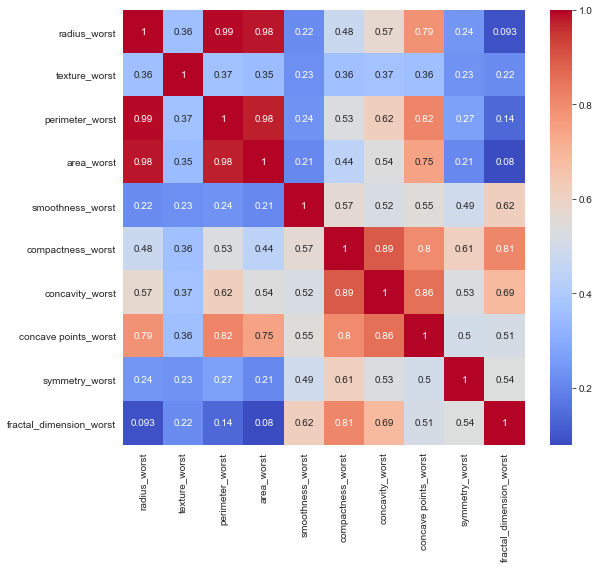

In [147]:
plt.subplots(figsize=(9,8))
sns.heatmap(bc_worst.corr(), cmap = 'coolwarm', annot=True)

worst_corr = bc_worst.corr()

In [148]:

columns = np.full((worst_corr.shape[0],), True, dtype=bool)
for i in range(worst_corr.shape[0]):
    for j in range(i+1, worst_corr.shape[0]):
        if worst_corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
                


In [149]:
selected_col = worst_corr.columns[columns]

selected_col

Index(['radius_worst', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
bc_worst.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [78]:
#concave points_worst 

#max:0.29, min: 000

bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
names = ['<0.05', '0.05-0.10','0.10-0.15', '0.15-0.20','0.20-0.25','0.25-0.30']
 
breastcancer['concave points_worst_bins'] = pd.cut(breastcancer['concave points_worst'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,concave points_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.25-0.30
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.15-0.20
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.20-0.25
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.25-0.30
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.15-0.20


In [79]:
#Frequency_table for radius_worst

test19=breastcancer.groupby(['diagnosis','concave points_worst_bins']).count()['concave points_worst'].reset_index()
test19

,diagnosis,concave points_worst_bins,concave points_worst
0,0,<0.05,72.0
1,0,0.05-0.10,191.0
2,0,0.10-0.15,74.0
3,0,0.15-0.20,7.0
4,0,0.20-0.25,NaN
5,0,0.25-0.30,NaN
6,1,<0.05,1.0
7,1,0.05-0.10,8.0
8,1,0.10-0.15,38.0
9,1,0.15-0.20,93.0


In [80]:
# fractal_dimension_worst min 0.06  max 0.2 

bins = [0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24]
names = ['<0.04', '0.04-0.08','0.08-0.12', '0.12-0.16','0.16-0.20','0.20-0.24']
 
breastcancer['fractal_dimension_worst_bins'] = pd.cut(breastcancer['fractal_dimension_worst'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,concave points_worst_bins,fractal_dimension_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.25-0.30,0.08-0.12
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.15-0.20,0.08-0.12
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.20-0.25,0.08-0.12
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.25-0.30,0.16-0.20
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.15-0.20,0.04-0.08


In [81]:
#Frequency_table for radius_worst

test20=breastcancer.groupby(['diagnosis','fractal_dimension_worst_bins']).count()['fractal_dimension_worst'].reset_index()
test20

,diagnosis,fractal_dimension_worst_bins,fractal_dimension_worst
0,0,<0.04,NaN
1,0,0.04-0.08,212.0
2,0,0.08-0.12,139.0
3,0,0.12-0.16,6.0
4,0,0.16-0.20,NaN
5,0,0.20-0.24,NaN
6,1,<0.04,NaN
7,1,0.04-0.08,72.0
8,1,0.08-0.12,119.0
9,1,0.12-0.16,19.0


In [152]:
#radius_worst max:36.04 , min: 7.93

bins = [0, 5.5, 11.0, 16.5, 22.0, 27.5, 33.0]
names = ['<5.5', '5.5-11.0','11.0-16.5', '16.5-22.0','22.0-27.5','27.5-33.0']
 
breastcancer['radius_worst_bins'] = pd.cut(breastcancer['radius_worst'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins,symmetry_se_bins,radius_worst_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.7119,0.2654,0.4601,0.11890,10-15,0.20-0.25,1.0-1.5,0.9-1.8,0.030-0.045,22.0-27.5
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.2416,0.1860,0.2750,0.08902,15-20,0.15-0.20,0.5-1.0,<0.9,<0.015,22.0-27.5
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4504,0.2430,0.3613,0.08758,20-25,0.20-0.25,0.5-1.0,<0.9,0.015-0.030,22.0-27.5
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.6869,0.2575,0.6638,0.17300,20-25,0.25-0.30,<0.5,0.9-1.8,0.045-0.060,11.0-16.5
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.4000,0.1625,0.2364,0.07678,10-15,0.15-0.20,0.5-1.0,<0.9,0.015-0.030,22.0-27.5


In [153]:
#Frequency_table for radius_worst

test7=breastcancer.groupby(['diagnosis','radius_worst_bins']).count()['radius_worst'].reset_index()
test7

,diagnosis,radius_worst_bins,radius_worst
0,B,<5.5,NaN
1,B,5.5-11.0,46.0
2,B,11.0-16.5,294.0
3,B,16.5-22.0,17.0
4,B,22.0-27.5,NaN
5,B,27.5-33.0,NaN
6,M,<5.5,NaN
7,M,5.5-11.0,NaN
8,M,11.0-16.5,32.0
9,M,16.5-22.0,94.0


In [154]:
#texture_worst max:49.54 , min: 12.02

bins = [0, 8.5, 17.0, 25.5, 34.0, 42.5, 51.0]
names = ['<8.5', '8.5-17.0','17.0-25.5', '25.5-34.0','34.0-42.5','42.5-51.0']
 
breastcancer['texture_worst_bins'] = pd.cut(breastcancer['texture_worst'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins,symmetry_se_bins,radius_worst_bins,texture_worst_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.2654,0.4601,0.11890,10-15,0.20-0.25,1.0-1.5,0.9-1.8,0.030-0.045,22.0-27.5,17.0-25.5
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1860,0.2750,0.08902,15-20,0.15-0.20,0.5-1.0,<0.9,<0.015,22.0-27.5,17.0-25.5
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.2430,0.3613,0.08758,20-25,0.20-0.25,0.5-1.0,<0.9,0.015-0.030,22.0-27.5,25.5-34.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.2575,0.6638,0.17300,20-25,0.25-0.30,<0.5,0.9-1.8,0.045-0.060,11.0-16.5,25.5-34.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.1625,0.2364,0.07678,10-15,0.15-0.20,0.5-1.0,<0.9,0.015-0.030,22.0-27.5,8.5-17.0


In [155]:
#Frequency_table for texture_worst

test8=breastcancer.groupby(['diagnosis','texture_worst_bins']).count()['texture_worst'].reset_index()
test8

,diagnosis,texture_worst_bins,texture_worst
0,B,<8.5,NaN
1,B,8.5-17.0,37.0
2,B,17.0-25.5,207.0
3,B,25.5-34.0,95.0
4,B,34.0-42.5,18.0
5,B,42.5-51.0,NaN
6,M,<8.5,NaN
7,M,8.5-17.0,1.0
8,M,17.0-25.5,49.0
9,M,25.5-34.0,127.0


In [157]:
#symmetry_worst max:0.66 , min: 0.16

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
names = ['<0.1', '0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6']
 
breastcancer['symmetry_worst_bins'] = pd.cut(breastcancer['symmetry_worst'], bins, labels=names)
breastcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_worst,fractal_dimension_worst,texture_mean_bins,symmetry_mean_bins,radius_se_bins,texture_se_bins,symmetry_se_bins,radius_worst_bins,texture_worst_bins,symmetry_worst_bins
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.4601,0.11890,10-15,0.20-0.25,1.0-1.5,0.9-1.8,0.030-0.045,22.0-27.5,17.0-25.5,0.4-0.5
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.2750,0.08902,15-20,0.15-0.20,0.5-1.0,<0.9,<0.015,22.0-27.5,17.0-25.5,0.2-0.3
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.3613,0.08758,20-25,0.20-0.25,0.5-1.0,<0.9,0.015-0.030,22.0-27.5,25.5-34.0,0.3-0.4
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.6638,0.17300,20-25,0.25-0.30,<0.5,0.9-1.8,0.045-0.060,11.0-16.5,25.5-34.0,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2364,0.07678,10-15,0.15-0.20,0.5-1.0,<0.9,0.015-0.030,22.0-27.5,8.5-17.0,0.2-0.3


In [158]:
#Frequency_table for symmetry_worst

test9=breastcancer.groupby(['diagnosis','symmetry_worst_bins']).count()['symmetry_worst'].reset_index()
test9

,diagnosis,symmetry_worst_bins,symmetry_worst
0,B,<0.1,NaN
1,B,0.1-0.2,16.0
2,B,0.2-0.3,255.0
3,B,0.3-0.4,84.0
4,B,0.4-0.5,2.0
5,B,0.5-0.6,NaN
6,M,<0.1,NaN
7,M,0.1-0.2,4.0
8,M,0.2-0.3,82.0
9,M,0.3-0.4,96.0


####  conclusion: radius_worst, texture_worst, symmetry_worst are all good to use 

---